In [1]:
import os
import sys

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
module_path = os.path.abspath(os.path.join('../transfermarket/'))
if module_path not in sys.path:
    sys.path.append(module_path)

from transfermarket import leagues, players, teams

In [2]:
prem_clubs_18 = leagues.get_prem_club_list(season="2018")
prem_clubs_18

{'Manchester City': '/manchester-city/startseite/verein/281/saison_id/2018',
 'Liverpool FC': '/fc-liverpool/startseite/verein/31/saison_id/2018',
 'Chelsea FC': '/fc-chelsea/startseite/verein/631/saison_id/2018',
 'Tottenham Hotspur': '/tottenham-hotspur/startseite/verein/148/saison_id/2018',
 'Manchester United': '/manchester-united/startseite/verein/985/saison_id/2018',
 'Arsenal FC': '/fc-arsenal/startseite/verein/11/saison_id/2018',
 'Everton FC': '/fc-everton/startseite/verein/29/saison_id/2018',
 'Leicester City': '/leicester-city/startseite/verein/1003/saison_id/2018',
 'West Ham United': '/west-ham-united/startseite/verein/379/saison_id/2018',
 'AFC Bournemouth': '/afc-bournemouth/startseite/verein/989/saison_id/2018',
 'Southampton FC': '/fc-southampton/startseite/verein/180/saison_id/2018',
 'Wolverhampton Wanderers': '/wolverhampton-wanderers/startseite/verein/543/saison_id/2018',
 'Crystal Palace': '/crystal-palace/startseite/verein/873/saison_id/2018',
 'Fulham FC': '/fc-

In [3]:
lpool_19_players = teams.get_players(team_url=prem_clubs_18['Liverpool FC'])

/home/ismail/projects/football-data-viz/transfermarket/transfermarket/teams.py:20: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 20 of the file /home/ismail/projects/football-data-viz/transfermarket/transfermarket/teams.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = bs4.BeautifulSoup(team_res.text)


In [4]:
lpool_19_players.keys()

dict_keys(['Dejan Lovren', 'Divock Origi', 'Marko Grujić', 'Ádám Bogdán', 'Kamil Grabara', 'Joel Matip', 'Sheyi Ojo', 'Ki-Jana Hoever', 'Joe Gomez', 'Daniel Sturridge', 'Loris Karius', 'Georginio Wijnaldum', 'Caoimhín Kelleher', 'Danny Ings', 'Naby Keïta', 'Nathaniel Clyne', 'Ben Woodburn', 'Mohamed Salah', 'Sadio Mané', 'Fabinho', 'Simon Mignolet', 'Roberto Firmino', 'Alex Oxlade-Chamberlain', 'Dominic Solanke', 'Trent Alexander-Arnold', 'Harry Wilson', 'Rafael Camacho', 'Virgil van Dijk', 'James Milner', 'Curtis Jones', 'Rhian Brewster', 'Andrew Robertson', 'Connor Randall', 'Alisson', 'Jordan Henderson', 'Xherdan Shaqiri', 'Adam Lallana', 'Isaac Christie-Davies', 'Alberto Moreno'])

The squad that started in the Champions league final had never started before, and has never started since that unforgettable night in 2019. 

Let's explore why they never played together by looking at their availability in that season (we'll look at the surrounding seasons later)

In [5]:
cl_19_lineup = ['Trent Alexander-Arnold','Georginio Wijnaldum', 'Fabinho','Jordan Henderson', 'Roberto Firmino', 'Mohamed Salah', 'Joel Matip','Virgil van Dijk','Sadio Mané', 'Andrew Robertson', 'Alisson']

In [6]:
cl_19_lineup_urls = {player:"https://www.transfermarkt.com" + url for player,url in lpool_19_players.items() if player in cl_19_lineup}

In [7]:
avail_19 = []

for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2018")

    avail_19.append(avail_df)

grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


In [8]:
strangers= pd.concat(avail_19)
liverpool_fix = teams.get_team_fixtures(prem_clubs_18["Liverpool FC"], "2018")
fixtures_num_starters = strangers.T.join(liverpool_fix, how="right")
heatmap_data = fixtures_num_starters.iloc[:, :11].T

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'JetBrains Mono'

In [10]:
# assumption: na means they were likely suspended
# either way they werent in the squad so makes sense 
# to assign that (to me atleast!) 
fixtures_num_starters.fillna(3, inplace=True)
fixtures_num_starters = fixtures_num_starters.iloc[:,:11]

# add count
fixtures_num_starters['strangers_count'] = (fixtures_num_starters == 4 ).sum(axis=1)
fixtures_num_starters.reset_index(inplace=True, drop=True)

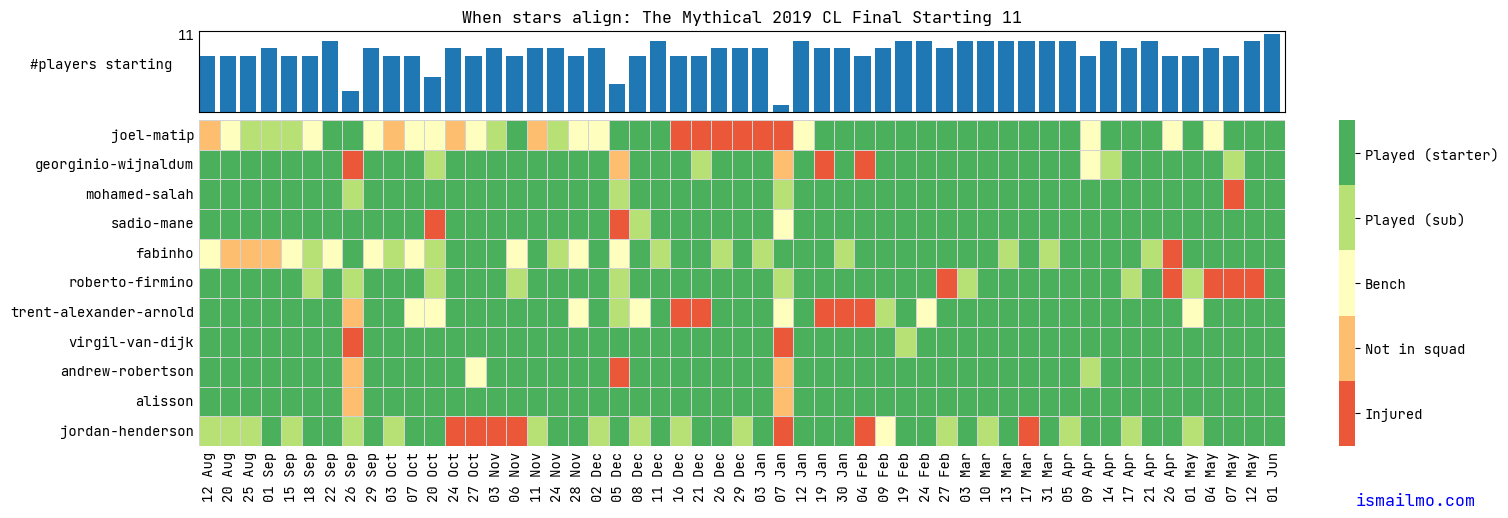

In [11]:
availability_levels_map = {
                        'Injured':0, 
                        'Not in squad':1,
                        'Bench':2, 
                        'Played (sub)':3,
                        'Played (starter)':4 
                        }
fig,(ax1,ax2) = plt.subplots(figsize=(15,5), nrows=2, sharex=True, height_ratios=[1, 4], constrained_layout=True)

player_count = pd.DataFrame((fixtures_num_starters.iloc[:, :11]==4).sum(axis=1)).reset_index()
bar_plot = ax1.bar(fixtures_num_starters.index, fixtures_num_starters["strangers_count"], align="edge")
_ = ax1.set_xlabel("")
_ = ax1.set_ylabel("#players starting",rotation="horizontal", ha="right" )
_ = ax1.set_title("When stars align: The Mythical 2019 CL Final Starting 11")
_ = ax1.yaxis.set_major_locator(matplotlib.ticker.FixedLocator([11]))
_ = ax1.tick_params(length=0)

num_levels = 5
plot = sns.heatmap(fixtures_num_starters.iloc[:, :-1].T, ax=ax2, cmap=sns.color_palette("RdYlGn",num_levels),linewidths=0.5, linecolor='lightgray')
colorbar = plot.collections[0].colorbar
total_bar_height = colorbar.vmax - colorbar.vmin 
lvl_bar_height = total_bar_height/num_levels


colorbar.set_ticks([colorbar.vmin + (lvl_bar_height * (0.5 + i)) for i in range(num_levels)])
colorbar.set_ticklabels([*availability_levels_map.keys()])

axs_fmtd = [l.strftime("%d %b") for l in liverpool_fix.index]
_ = ax2.set_xticklabels(axs_fmtd, rotation="vertical")
_ = ax2.set_xlabel("")
_ = ax2.tick_params(length=0)
_ = plt.gcf().text(0.9, 0, "ismailmo.com", fontsize=12, fontdict={'color':  'blue'} )


Lets grab some data for the previous season:

In [12]:
liverpool_fix_18 = teams.get_team_fixtures(prem_clubs_18["Liverpool FC"], "2017")

In [13]:
avail_18 = []

for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2017", add_match_result=True)
    # add liverpool fixture data
    avail_df = avail_df.T.join(liverpool_fix_18, how="right", rsuffix="_lpool")
    avail_18.append(avail_df.T)


grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


We need to account for when players didn't play for Liverpool - e.g. Virgil Van Dijk only join in January 2018

In [14]:
avail_18[7]

Date,2017-08-12,2017-08-15,2017-08-19,2017-08-23,2017-08-27,2017-09-09,2017-09-13,2017-09-16,2017-09-19,2017-09-23,...,2018-04-07,2018-04-10,2018-04-14,2018-04-21,2018-04-24,2018-04-28,2018-05-02,2018-05-06,2018-05-13,2018-05-26
virgil-van-dijk,0,NaN,0,0,NaN,0,NaN,3,NaN,2,...,4,4,4,4,4,4,4,4,4,4
Home team.1,Southampton (11.),NaN,Southampton (11.),Southampton,NaN,Southampton (8.),NaN,Crystal Palace (20.),NaN,Southampton (9.),...,Everton (9.),Man City,Liverpool (4.),West Brom (20.),Liverpool,Liverpool (3.),AS Roma,Chelsea (5.),Liverpool (4.),Real Madrid
Away team.1,Swansea (12.),NaN,West Ham (20.),Wolves,NaN,Watford (7.),NaN,Southampton (13.),NaN,Man Utd (2.),...,Liverpool (4.),Liverpool,Bournemouth (11.),Liverpool (3.),AS Roma,Stoke City (19.),Liverpool,Liverpool (4.),Brighton (14.),Liverpool
Result,0:0,NaN,3:2,0:2,NaN,0:2,NaN,0:1,NaN,0:1,...,0:0,1:2,3:0,2:2,5:2,0:0,4:2,1:0,4:0,3:1
Matchday,1,Qualifying Round 1st leg,2,Qualifying Round 2nd leg,3,4,Group E,5,Third Round,6,...,33,Quarter-Finals 2nd leg,34,35,Semi-Finals 1st Leg,36,Semi-Finals 2nd Leg,37,38,Final
Time,13:30,20:45,16:00,20:45,17:00,13:30,20:45,16:00,20:45,18:30,...,13:30,20:45,18:30,13:30,20:45,13:30,20:45,17:30,16:00,20:45
Home team.1_lpool,Watford (14.),TSG Hoffenheim,Liverpool (9.),Liverpool,Liverpool (6.),Man City (4.),Liverpool,Liverpool (8.),Leicester,Leicester (15.),...,Everton (9.),Man City,Liverpool (4.),West Brom (20.),Liverpool,Liverpool (3.),AS Roma,Chelsea (5.),Liverpool (4.),Real Madrid
Away team.1_lpool,Liverpool (4.),Liverpool,Crystal Palace (19.),TSG Hoffenheim,Arsenal (12.),Liverpool (2.),Sevilla FC,Burnley (7.),Liverpool,Liverpool (8.),...,Liverpool (4.),Liverpool,Bournemouth (11.),Liverpool (3.),AS Roma,Stoke City (19.),Liverpool,Liverpool (4.),Brighton (14.),Liverpool
System of play,4-3-3 Attacking,4-3-3 Attacking,4-2-3-1,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-1-4-1,4-1-4-1,4-3-3 Attacking,...,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-3-3 Attacking,4-4-2 Diamond,4-4-2 double 6,4-3-3 Attacking
Coach,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,...,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp,Jürgen Klopp


In [15]:
def is_liverpool(rw):
    try:
        if 'Liverpool' in rw['Home team.1'] or 'Liverpool' in rw['Away team.1']:
            return True
        else:
            return False
    except TypeError:
        return False 
vvd = avail_18[7].T
vvd['is_lpool'] = vvd.apply(is_liverpool, axis=1)

In [16]:
def add_diff_team_availability(rw):
    """add -1 if player isn't playing a liverpool game"""
    if rw['is_lpool'] == False:
        return -1
    else:
        # availability col
        return rw[0]

vvd.iloc[:,0] = vvd.apply(add_diff_team_availability, axis=1)

This heuristic doesn't work when they play against Liverpool for their old club - but we can fix that manually for now

In [17]:
vvd.sample(5)

,virgil-van-dijk,Home team.1,Away team.1,Result,Matchday,Time,Home team.1_lpool,Away team.1_lpool,System of play,Coach,Attendance,Result_lpool,Win,is_lpool
Date,,,,,,,,,,,,,,
2017-09-09,-1,Southampton (8.),Watford (7.),0:2,4,13:30,Man City (4.),Liverpool (2.),4-3-3 Attacking,Jürgen Klopp,54.172,5:0,L,False
2018-04-28,4,Liverpool (3.),Stoke City (19.),0:0,36,13:30,Liverpool (3.),Stoke City (19.),4-3-3 Attacking,Jürgen Klopp,53.255,0:0,D,True
2018-04-21,4,West Brom (20.),Liverpool (3.),2:2,35,13:30,West Brom (20.),Liverpool (3.),4-3-3 Attacking,Jürgen Klopp,24.520,2:2,D,True
2017-09-16,-1,Crystal Palace (20.),Southampton (13.),0:1,5,16:00,Liverpool (8.),Burnley (7.),4-1-4-1,Jürgen Klopp,53.231,1:1,D,False
2017-12-17,-1,NaN,NaN,NaN,18,17:30,Bournemouth (14.),Liverpool (5.),4-2-3-1,Jürgen Klopp,10.780,0:4,W,False


Add this to our loop for 17/18

In [18]:
avail_18 = []
for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2017", add_match_result=True)
    # add liverpool fixture data
    transposed_df = avail_df.T
    transposed_df= transposed_df.join(liverpool_fix_18, how="right", rsuffix="_lpool")

    transposed_df['is_lpool'] = transposed_df.apply(is_liverpool, axis=1)
    transposed_df.iloc[:,0] = transposed_df.apply(add_diff_team_availability, axis=1)
    transposed_df = pd.DataFrame(transposed_df.iloc[:,0]).T
    avail_18.append(transposed_df)
    
avail_18_all = pd.concat(avail_18)
avail_18_all.fillna(3, inplace=True)

# add count
long_avail_18_df = avail_18_all.T
long_avail_18_df['strangers_count'] = (long_avail_18_df == 4 ).sum(axis=1)
long_avail_18_df.reset_index(inplace=True, drop=True)

grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


...and for the next season 19/20

In [19]:
liverpool_fix_20 = teams.get_team_fixtures(prem_clubs_18["Liverpool FC"], "2019")
avail_20 = []
for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2019", add_match_result=True)
    # add liverpool fixture data
    transposed_df = avail_df.T
    transposed_df= transposed_df.join(liverpool_fix_20, how="right", rsuffix="_lpool")

    transposed_df['is_lpool'] = transposed_df.apply(is_liverpool, axis=1)
    transposed_df.iloc[:,0] = transposed_df.apply(add_diff_team_availability, axis=1)
    transposed_df = pd.DataFrame(transposed_df.iloc[:,0]).T
    avail_20.append(transposed_df)
    
avail_20_all = pd.concat(avail_20)
avail_20_all.fillna(3, inplace=True)

# add count
long_avail_20_df = avail_20_all.T
long_avail_20_df['strangers_count'] = (long_avail_20_df == 4 ).sum(axis=1)
long_avail_20_df.reset_index(inplace=True, drop=True)

grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


Add Season 20/21

In [20]:
liverpool_fix_21 = teams.get_team_fixtures(prem_clubs_18["Liverpool FC"], "2020")
avail_21 = []
for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2020", add_match_result=True)
    # add liverpool fixture data
    transposed_df = avail_df.T
    transposed_df= transposed_df.join(liverpool_fix_21, how="right", rsuffix="_lpool")

    transposed_df['is_lpool'] = transposed_df.apply(is_liverpool, axis=1)
    transposed_df.iloc[:,0] = transposed_df.apply(add_diff_team_availability, axis=1)
    transposed_df = pd.DataFrame(transposed_df.iloc[:,0]).T
    avail_21.append(transposed_df)
    
avail_21_all = pd.concat(avail_21)
avail_21_all.fillna(3, inplace=True)

# add count
long_avail_21_df = avail_21_all.T
long_avail_21_df['strangers_count'] = (long_avail_21_df == 4 ).sum(axis=1)
long_avail_21_df.reset_index(inplace=True, drop=True)

grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


Add season 21/22

In [21]:
liverpool_fix_22 = teams.get_team_fixtures(prem_clubs_18["Liverpool FC"], "2021")
avail_22 = []
for player,url in cl_19_lineup_urls.items():
    print("grabbing data for: " + player)
    avail_df = players.get_player_availability(url,"2021", add_match_result=True)
    # add liverpool fixture data
    transposed_df = avail_df.T
    transposed_df= transposed_df.join(liverpool_fix_22, how="right", rsuffix="_lpool")

    transposed_df['is_lpool'] = transposed_df.apply(is_liverpool, axis=1)
    transposed_df.iloc[:,0] = transposed_df.apply(add_diff_team_availability, axis=1)
    transposed_df = pd.DataFrame(transposed_df.iloc[:,0]).T
    avail_22.append(transposed_df)
    
avail_22_all = pd.concat(avail_22)
avail_22_all.fillna(3, inplace=True)

# add count
long_avail_22_df = avail_22_all.T
long_avail_22_df['strangers_count'] = (long_avail_22_df == 4 ).sum(axis=1)
long_avail_22_df.reset_index(inplace=True, drop=True)

grabbing data for: Joel Matip
grabbing data for: Georginio Wijnaldum
grabbing data for: Mohamed Salah
grabbing data for: Sadio Mané
grabbing data for: Fabinho
grabbing data for: Roberto Firmino
grabbing data for: Trent Alexander-Arnold
grabbing data for: Virgil van Dijk
grabbing data for: Andrew Robertson
grabbing data for: Alisson
grabbing data for: Jordan Henderson


In [22]:
all_fix_dates = [*avail_18_all.columns, *liverpool_fix.index,*avail_20_all.columns, *avail_21_all.columns,*avail_22_all.columns]
all_avail = pd.concat([long_avail_18_df, fixtures_num_starters, long_avail_20_df, long_avail_21_df,long_avail_22_df])

In [23]:
all_avail.reset_index(inplace=True, drop=True)

In [24]:
all_avail['date'] = all_fix_dates
all_avail.tail()

,joel-matip,georginio-wijnaldum,mohamed-salah,sadio-mane,fabinho,roberto-firmino,trent-alexander-arnold,virgil-van-dijk,andrew-robertson,alisson,jordan-henderson,strangers_count,date
282,4.0,-1.0,3.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,3.0,6,2022-05-10
283,3.0,-1.0,4.0,4.0,0.0,3.0,4.0,4.0,4.0,4.0,4.0,7,2022-05-14
284,4.0,-1.0,1.0,1.0,0.0,4.0,1.0,0.0,2.0,4.0,3.0,3,2022-05-17
285,4.0,-1.0,3.0,4.0,0.0,3.0,4.0,2.0,4.0,4.0,4.0,6,2022-05-22
286,2.0,-1.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,8,2022-05-28


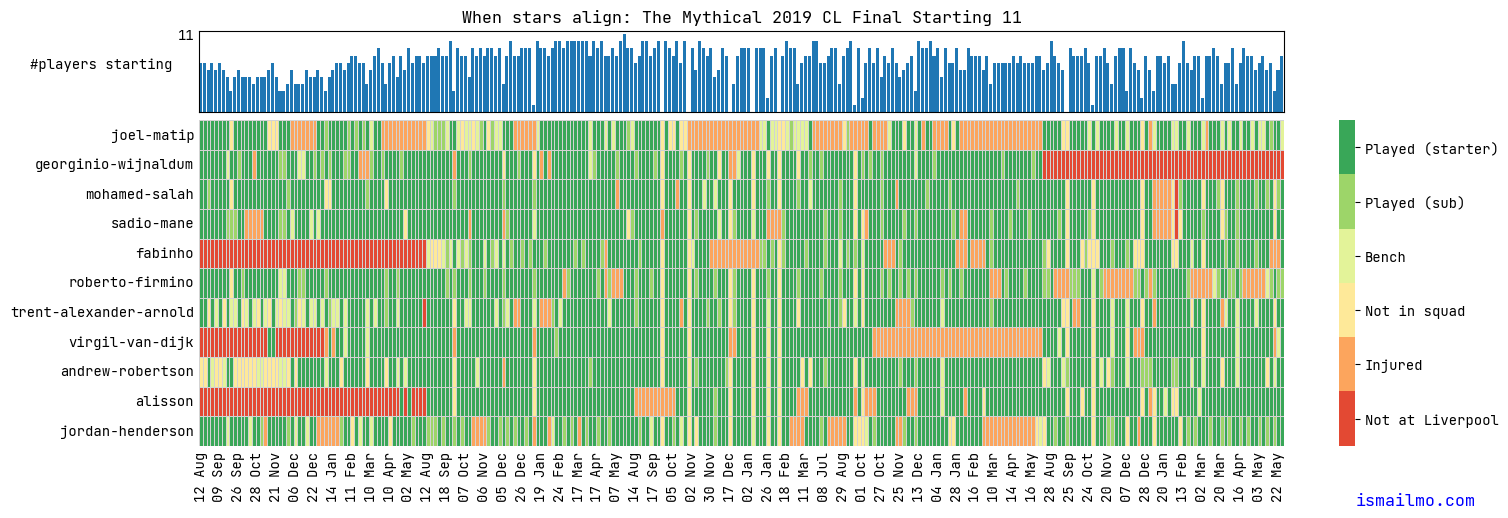

In [25]:
availability_levels_map = {
                        'Not at Liverpool' : -1,
                        'Injured':0, 
                        'Not in squad':1,
                        'Bench':2, 
                        'Played (sub)':3,
                        'Played (starter)':4 
                        }
fig,(ax1,ax2) = plt.subplots(figsize=(15,5), nrows=2, sharex=True, height_ratios=[1, 4], constrained_layout=True)

bar_plot = ax1.bar(all_avail.index, all_avail["strangers_count"], align="edge")
_ = ax1.set_xlabel("")
_ = ax1.set_ylabel("#players starting",rotation="horizontal", ha="right" )
_ = ax1.set_title("When stars align: The Mythical 2019 CL Final Starting 11")
_ = ax1.yaxis.set_major_locator(matplotlib.ticker.FixedLocator([11]))
_ = ax1.tick_params(length=0)

num_levels = len(availability_levels_map.keys())
plot = sns.heatmap(all_avail.iloc[:, :-2].T, ax=ax2, cmap=sns.color_palette("RdYlGn",num_levels),linewidths=0.5, linecolor='lightgray')
colorbar = plot.collections[0].colorbar
total_bar_height = colorbar.vmax - colorbar.vmin 
lvl_bar_height = total_bar_height/num_levels


colorbar.set_ticks([colorbar.vmin + (lvl_bar_height * (0.5 + i)) for i in range(num_levels)])
colorbar.set_ticklabels([*availability_levels_map.keys()])

axs_fmtd = [all_avail.loc[int(i.get_text()), 'date'].strftime("%d %b") for i in ax2.get_xticklabels()]
_ = ax2.set_xticklabels(axs_fmtd, rotation="vertical")
_ = ax2.set_xlabel("")
_ = ax2.tick_params(length=0)
_ = plt.gcf().text(0.9, 0, "ismailmo.com", fontsize=12, fontdict={'color':  'blue'} )

Some anomalies where some players are marked as "Not at liverpool" even though they are (see trent-alexander-arnold, mane and salah)

Mane and Salah were playing eachother at the AFCON final - so technically the graph is correct :)

In [26]:
all_avail[all_avail["sadio-mane"] == -1][["sadio-mane", 'date']]

,sadio-mane,date
258,-1.0,2022-02-06


In [27]:
all_avail[all_avail["mohamed-salah"] == -1][["sadio-mane", 'date']]

,sadio-mane,date
258,-1.0,2022-02-06


For Trent, the England team were playing at the same time (which Trent used to play for) - since this is a rare edge case I'll just overwrite it manually

In [41]:
url = cl_19_lineup_urls['Trent Alexander-Arnold']
avail_df = players.get_player_availability(url,"2017", add_match_result=True)
# add liverpool fixture data
transposed_df = avail_df.T
transposed_df= transposed_df.join(liverpool_fix_18, how="right", rsuffix="_lpool")

transposed_df['is_lpool'] = transposed_df.apply(is_liverpool, axis=1)
transposed_df.iloc[:,0] = transposed_df.apply(add_diff_team_availability, axis=1)
transposed_df = pd.DataFrame(transposed_df.iloc[:,0]).T
import datetime
avail_df.loc[:,datetime.date(2018,5,26)]

Date,2018-05-26,2018-05-26
trent-alexander-arnold,4,1
Home team.1,Real Madrid,England U21
Away team.1,Liverpool,China U20
Result,3:1,2:1


In [80]:
trent_outlier = all_avail['date']==datetime.datetime(2018,5,26)
all_avail.loc[trent_outlier,"trent-alexander-arnold"] = 4

Since the full squad were only playing for Liverpool FC during 2019/19 - 2021-22 - we can remove the other seasons (we'll keep a few rows to highlight their departure/arrival at Liverpool)

In [81]:
cl_19_lineup_at_lpool_avail_df = all_avail[(all_avail.loc[:,'date']>datetime.datetime(2018,5,10)) &( all_avail.loc[:,'date']<datetime.datetime(2021,8,30))]
cl_19_lineup_at_lpool_avail_df.reset_index(inplace=True, drop=True)

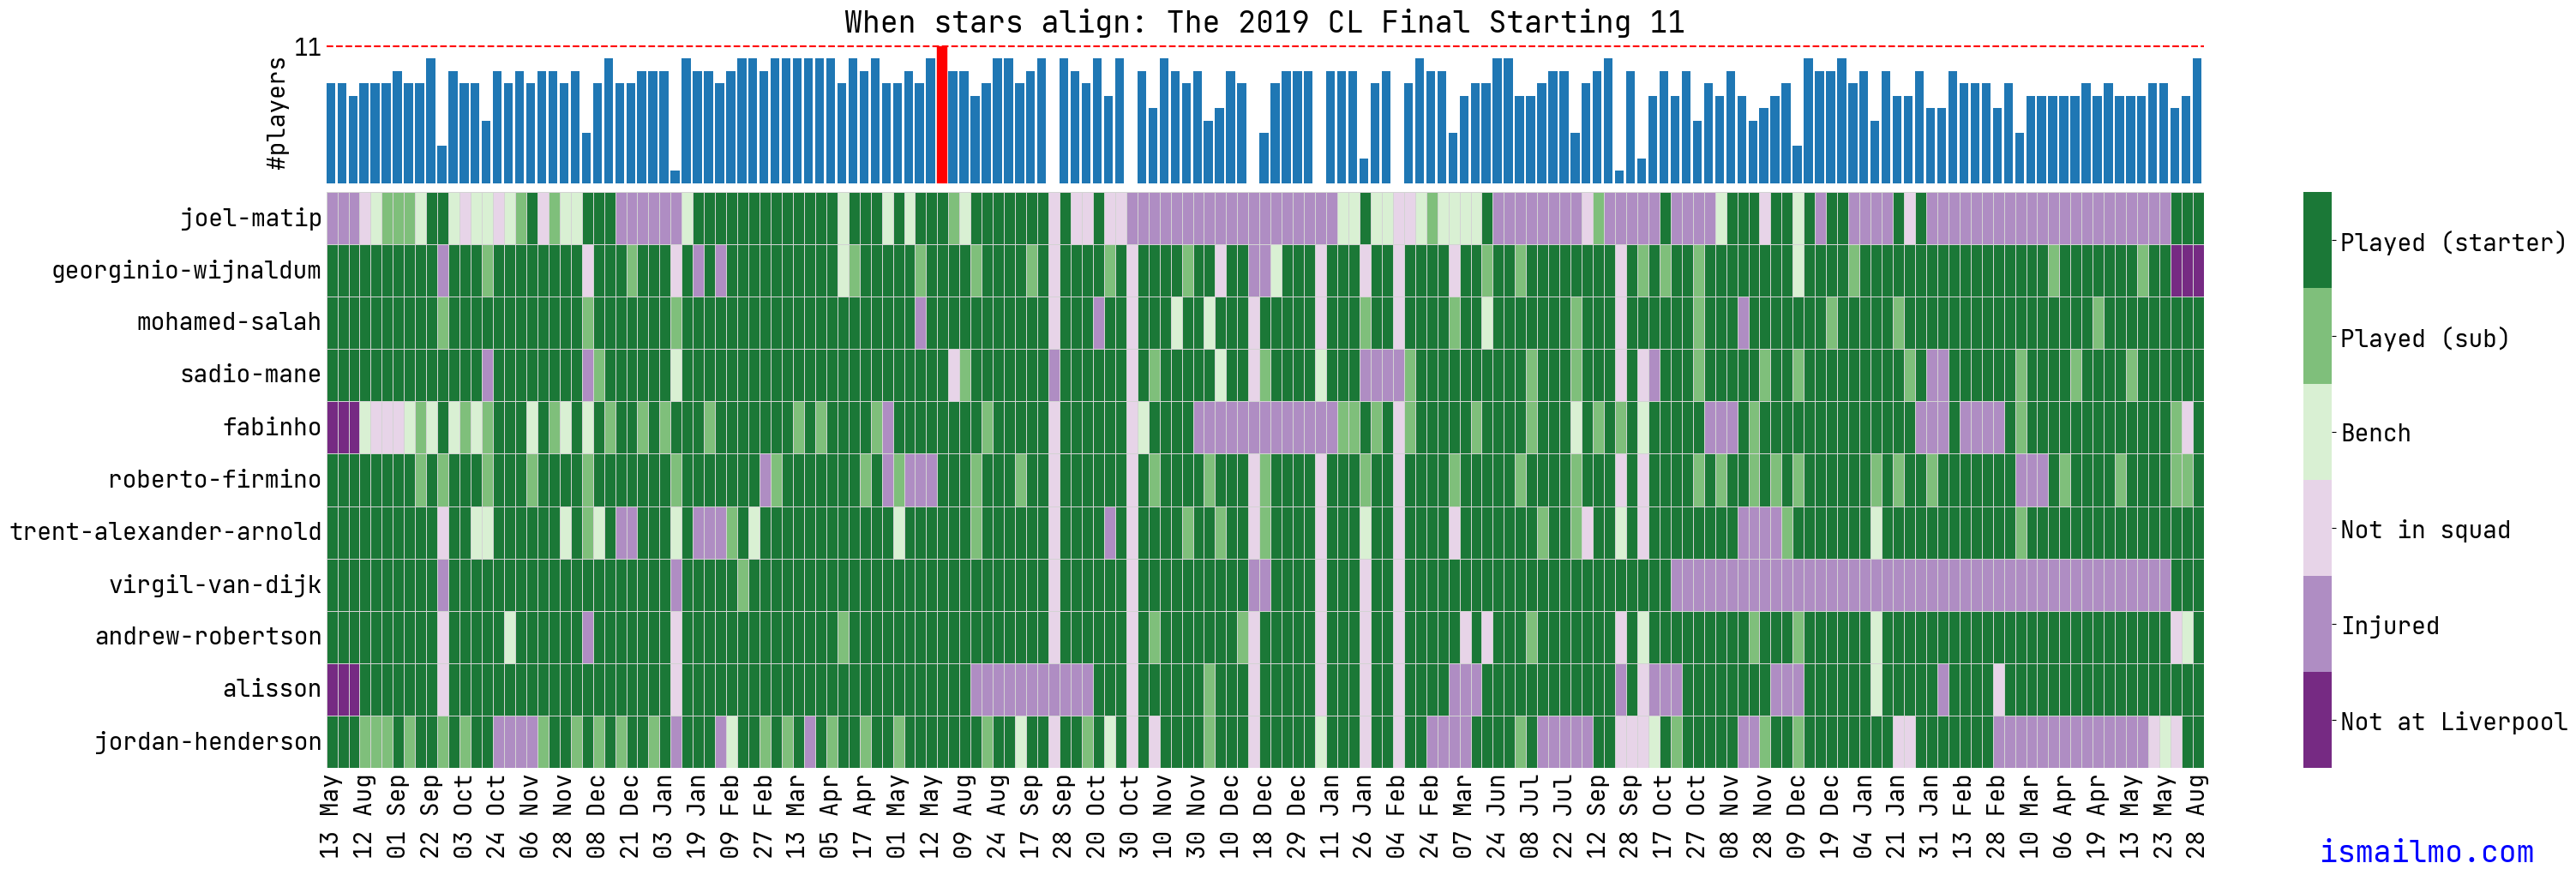

In [137]:
matplotlib.rcParams['font.size'] = '20'
plt.rcParams["axes.titlesize"] ="10" 
color_scheme = ['#b2182b','#ef8a62','#fddbc7','#d1e5f0','#67a9cf','#2166ac']
alt_color_scheme = ['#762a83','#af8dc3','#e7d4e8','#d9f0d3','#7fbf7b','#1b7837']

availability_levels_map = {
                        'Not at Liverpool' : -1,
                        'Injured':0, 
                        'Not in squad':1,
                        'Bench':2, 
                        'Played (sub)':3,
                        'Played (starter)':4 
                        }
fig,(ax1,ax2) = plt.subplots(figsize=(30,10), nrows=2, sharex=True, height_ratios=[1, 4], constrained_layout=True)

bar_plot = ax1.bar(cl_19_lineup_at_lpool_avail_df.index, cl_19_lineup_at_lpool_avail_df["strangers_count"], align="edge")
for i,bar in enumerate(bar_plot):
    if cl_19_lineup_at_lpool_avail_df["strangers_count"][i] ==11:
        bar.set_color("r")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.axhline(y=11, color='r', ls='--')
_ = ax1.set_title("When stars align: The 2019 CL Final Starting 11", fontdict={"fontsize":"25"} )
_ = ax1.set_xlabel("")

_ = ax1.set_ylabel("#players",rotation="vertical", ha="center")

_ = ax1.yaxis.set_major_locator(matplotlib.ticker.FixedLocator([11]))
_ = ax1.tick_params(length=0)

num_levels = len(availability_levels_map.keys())
plot = sns.heatmap(cl_19_lineup_at_lpool_avail_df.iloc[:, :-2].T, ax=ax2, cmap=alt_color_scheme,linewidths=0.5, linecolor='lightgray')
colorbar = plot.collections[0].colorbar
total_bar_height = colorbar.vmax - colorbar.vmin 
lvl_bar_height = total_bar_height/num_levels


colorbar.set_ticks([colorbar.vmin + (lvl_bar_height * (0.5 + i)) for i in range(num_levels)])
colorbar.set_ticklabels([*availability_levels_map.keys()])

axs_fmtd = [cl_19_lineup_at_lpool_avail_df.loc[int(i.get_text()), 'date'].strftime("%d %b") for i in ax2.get_xticklabels()]
_ = ax2.set_xticklabels(axs_fmtd, rotation="vertical")
_ = ax2.set_xlabel("")
_ = ax2.tick_params(length=0)
_ = plt.gcf().text(0.9, 0, "ismailmo.com", fontsize=25, fontdict={'color':  'blue'} )

In [138]:
fig.savefig("heatmap.svg")